## Precision-focused ML for Email Spam Detection: NLP Classification

#### Aim and Goal:
The primary aim is to develop an effective email spam detection system using Natural Language Processing (NLP) techniques followed by machine learning model training. The main goal was to optimize the precision metric, prioritizing the accurate identification of spam emails while minimizing false positives.

#### Importance of Precision in Evaluation:
The evaluation matrix includes various performance metrics such as accuracy, precision, recall, and F1-score, among others. However, particular attention was given to precision due to its significance in spam detection. Precision measures the proportion of correctly identified spam emails among all emails classified as spam. Reducing false positives (legitimate emails classified as spam) is crucial to ensure that important messages are not overlooked or misclassified. Hence, optimizing precision helps maintain the integrity of the email inbox by minimizing the risk of filtering out legitimate emails.


### Importing Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Data

In [3]:
df = pd.read_csv(r'D:\Microsoft_AI_ML_Course\Examples\ModelProjects\csv\16_mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Check Data Shape
df.shape

(5572, 2)

In [5]:
# Check Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
# Find Duplicate
df.duplicated().any()

np.True_

In [7]:
# drop Duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().any()

np.False_

### Distribution of Spam v/s Ham

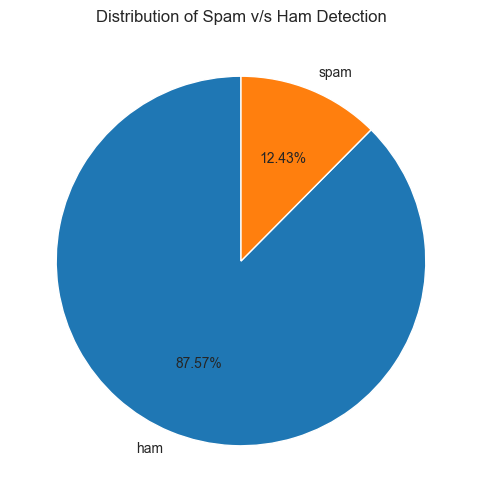

In [9]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the Pie Chart for distribution
plt.figure(figsize = (6,6))
plt.pie(category_counts, labels = category_counts.index, autopct='%1.2f%%', startangle = 90)
plt.title('Distribution of Spam v/s Ham Detection')
plt.show()

### Text Visualization

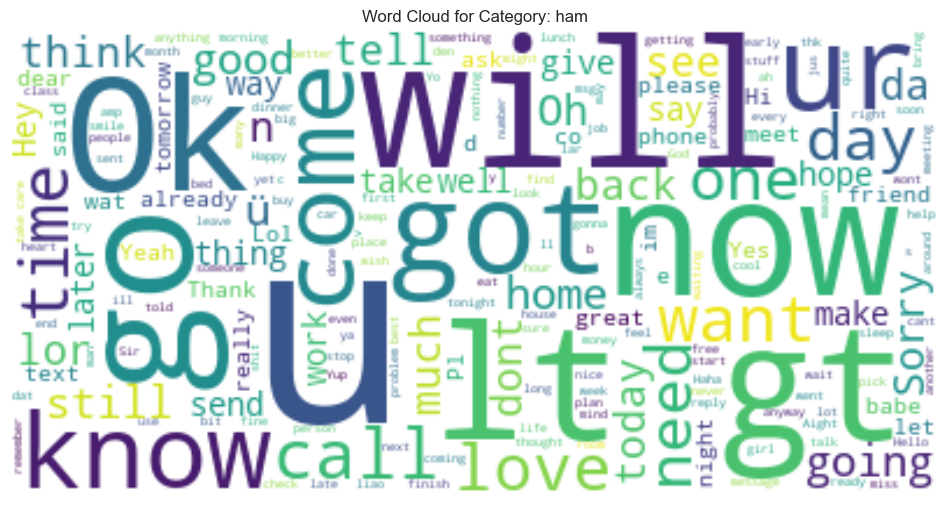

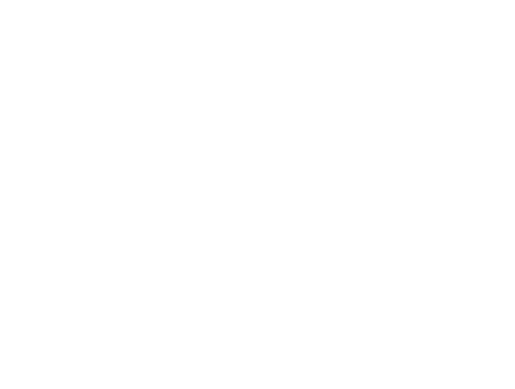

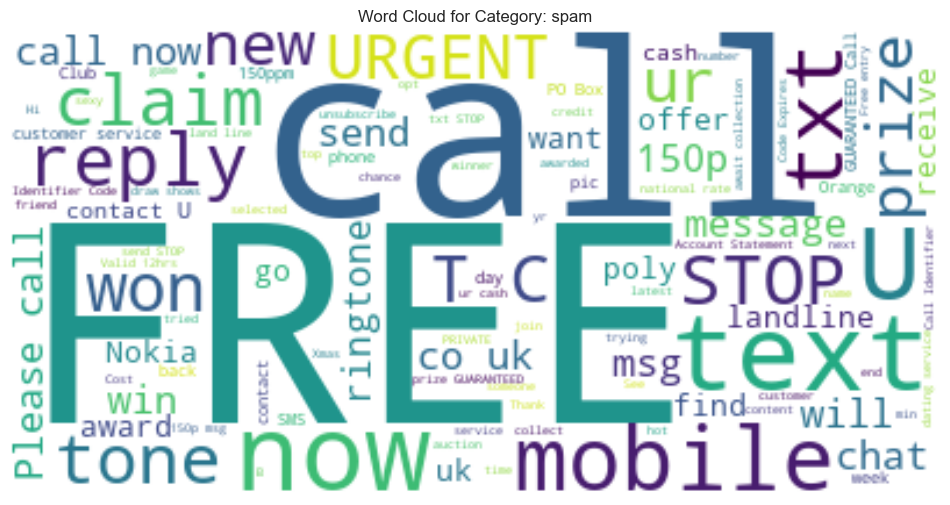

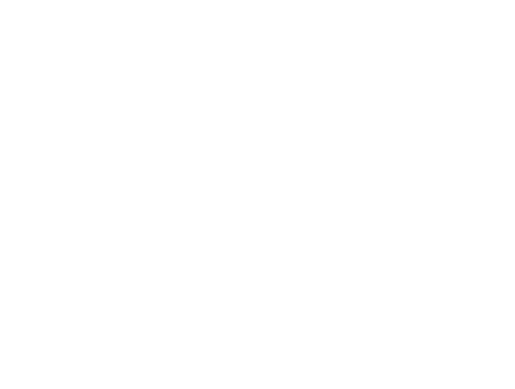

In [10]:
# Looping through all categories
for category in df['Category'].unique():
    # Filter the data for current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data relevant to filtered category
    text = ' '.join(filtered_df['Message'])

    # Generate the Word Cloud
    wordCloud = WordCloud(width=400,height=200, background_color='white').generate(text)

    # Plotting the word cloud
    plt.figure(figsize = (12,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()
    plt.axis('off')


In [11]:
# Encode Category column
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing
1. Lower Casing
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric
9. Handling ChatWords
10. Handling StopWords
11. Handling Emojis
12. Stemming

#### 1. Lower Case Text

In [12]:
# Lower case the text
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


#### 2. Removing Extra White Spaces

In [13]:
# Removing White spaces
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


#### 3. Removing HTML Tags

In [14]:
# Removing HTML Tags from the text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()


df['Message'] = df['Message'].apply(remove_html_tags)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


#### 4.Remove URLs

In [15]:
# Remove Urls from text using Regular Expresssion and wherever Url is present, we will provide URL_TOKEN
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', 'URL_TOKEN', text)

df['Message'] = df['Message'].apply(remove_urls)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


#### 5. Remove Punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
# Define the punctuation characters to remove
punctuation = string.punctuation

# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)

In [18]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### 6. Remove Special Characters

In [19]:
# Removing Special characters using Regular Expression
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]' # Matches any character that is not alphanumeric or whitespace
    return re.sub(pattern, '', text)

df['Message'] = df['Message'].apply(remove_special_characters)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### 7. Removing Numeric Values

In [20]:
# Removing numeric values using Regex
def remove_numeric_values(text):
    return re.sub(r'\d+', '', text)

df['Message'] = df['Message'].apply(remove_numeric_values)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### 8. Removing Non-AlphaNumeric Values

In [21]:
# Removing Non Alpha Numeric values using regex
def remove_non_alpha_numeric_values(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)
df['Message'] = df['Message'].apply(remove_non_alpha_numeric_values)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### 9. Handling ChatWords (short words used in Chats)

In [22]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [23]:
def replace_chat_words(text):
    words = text.split()
    for i,word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

df['Message'] = df['Message'].apply(replace_chat_words)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#### 10. Handling Stopwords

In [24]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove StopWords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['Message'] = df['Message'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


#### 11. Handling Emojis

In [25]:
# Removing Emojis
def remove_emojis(text):
    return emoji.demojize(text)
df['Message'] = df['Message'].apply(remove_emojis)

#### 12. Stemming
Stemming is a text processing technique used in natural language processing (NLP) to reduce words to their root or base form, known as the stem. The goal of stemming is to normalize words with similar meanings so that variations of the same word are treated as identical. This helps improve text analysis and information retrieval tasks by reducing the complexity of the vocabulary.

For example, stemming would convert words like "running," "runs," and "ran" to the common stem "run." Similarly, "fishes" and "fishing" would both be stemmed to "fish." While stemming can sometimes result in non-real words, it is a simple and efficient method for preprocessing text data in NLP tasks.

In [26]:
# Function for stemming Text
def stem_text(text):
    # 1. Split the sentence into individual words (tokens)
    words = text.split()
    porter_stemmer = PorterStemmer()

    # 2. Reduce each word to its root form (e.g., 'winning' -> 'win')
    stemmed_words = [porter_stemmer.stem(word) for word in words]

    # 3. Join the words back into a single string
    return " ".join(stemmed_words)

# Now apply it to your DataFrame
df['Message_stemmed'] = df['Message'].apply(stem_text)
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


### Model Building

### Text Vectorization
To convert Textual Data into Vectors we use Text Vectorization. We will be using CountVectorizer. CountVectorizer is a text vectorization method that converts a collection of text documents into a matrix of token counts.

In [27]:
cv = CountVectorizer()

# Fitting countVecotizer on X
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

### Train Test Split

In [28]:
# Train Test Split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(5157, 7075) (4125, 7075) (1032, 7075)


### Model Training for following models
We will be using following metrics:
1. Logistic Regression
2. Multinominal Naive Bayes
3. Gaussian Naive Bayes
4. Support Vector Machine (SVM)
5. Decision Tree Classifier
6. Random Forests Classifier
7. Gradient Boosting Classifier
8. XGBoost Classifier

For all this models we will first
- Call the model
- Fit the model
- Predict the model


In [30]:
# Logistic Regression with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Multinomial Naive Bayes with tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)
mnb_pred = mnb_model.predict(X_test)

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

# Support Vector Machines (SVM) with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Decision Trees with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forests with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier with tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# XGBoost Classifier with tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

### Model Evaluation

In [31]:
# Calculate accuracy, precision and recall for each model
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, average='weighted')
mnb_recall = recall_score(y_test, mnb_pred, average='weighted')
mnb_conf_matrix = confusion_matrix(y_test, mnb_pred)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

In [32]:
# Print precision, recall, and accuracy for each model
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}, The Precision Score is {lr_precision},The Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

print("Multinomial Naive Bayes:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy}, The Precision Score is {mnb_precision},The Recall Score is {mnb_recall}")
print(f"The Confusion matrix is \n{mnb_conf_matrix}")
print("\n")

print("Gaussian Naive Bayes:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy}, The Precision Score is {gnb_precision},The Recall Score is {gnb_recall}")
print(f"The Confusion matrix is \n{gnb_conf_matrix}")
print("\n")

print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy}, The Precision Score is {svm_precision},The Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}, The Precision Score is {dt_precision},The Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy}, The Precision Score is {rf_precision},The Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

print("Gradient Boosting Classifier:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy}, The Precision Score is {gb_precision},The Recall Score is {gb_recall}")
print(f"The Confusion matrix is \n{gb_conf_matrix}")
print("\n")

print("XGBoost Classifier:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy}, The Precision Score is {xgb_precision},The Recall Score is {xgb_recall}")
print(f"The Confusion matrix is \n{xgb_conf_matrix}")
print("\n")

Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015, The Precision Score is 0.9724528699938659,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]


Multinomial Naive Bayes:
The accuracy score of MultinomialNB is 0.9583333333333334, The Precision Score is 0.964237531019538,The Recall Score is 0.9583333333333334
The Confusion matrix is 
[[860  36]
 [  7 129]]


Gaussian Naive Bayes:
The accuracy score of GaussianNB is 0.8691860465116279, The Precision Score is 0.9179176426684793,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[776 120]
 [ 15 121]]


SVM:
The accuracy score of SVC is 0.8963178294573644, The Precision Score is 0.9073786392759705,The Recall Score is 0.8963178294573644
The Confusion matrix is 
[[896   0]
 [107  29]]


Decision Trees:
The accuracy score of Decision Tree classifier is 0.9573643410852714, The Precision Score is 0.9560343531345136,The Recall Score is 0.9573643410852714
The Conf

### Plotting graph for our Model Evaluation

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.971899   0.972453  0.971899
7              XGBoost  0.963178   0.962678  0.963178
6    Gradient Boosting  0.962209   0.961383  0.962209
1       Multinomial NB  0.956395   0.962437  0.956395
4        Decision Tree  0.953488   0.951870  0.953488
5        Random Forest  0.912791   0.920751  0.912791
3                  SVM  0.895349   0.906606  0.895349
2          Gaussian NB  0.869186   0.917918  0.869186


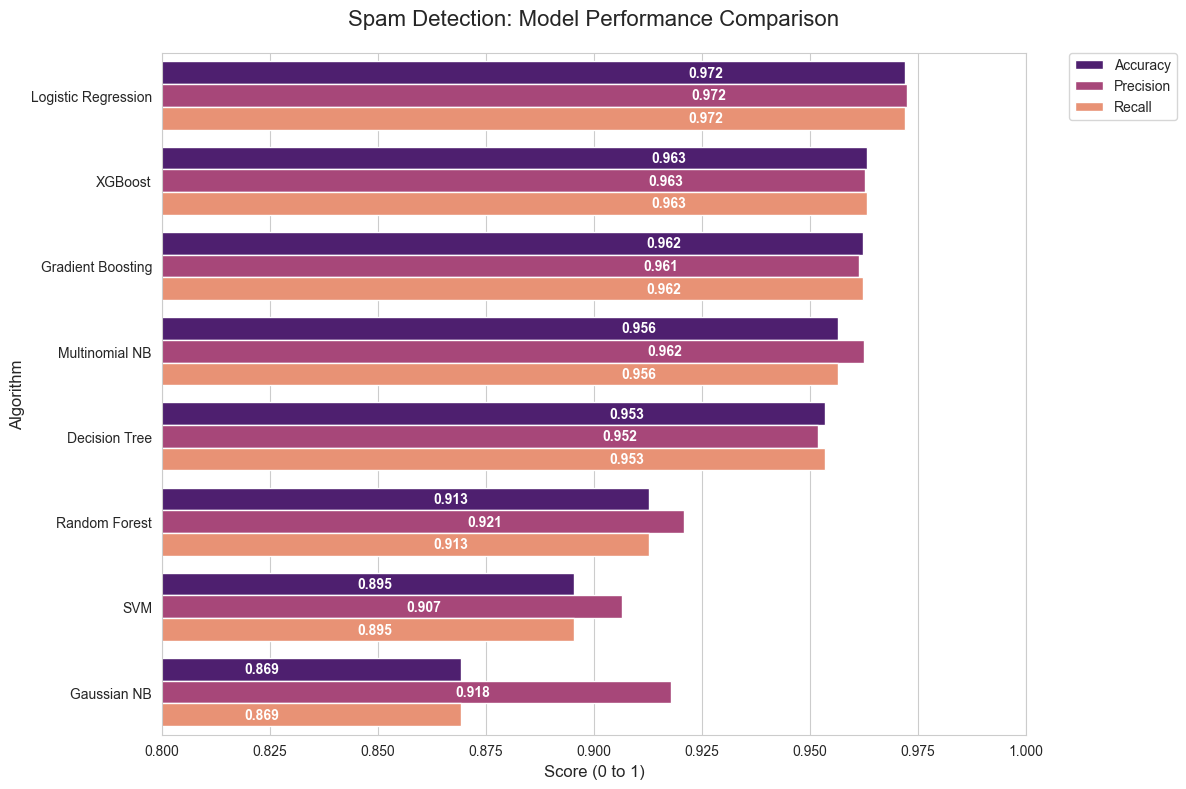

In [33]:
# 1. Prepare the data based on our results
data = {
    'Model': [
        'Logistic Regression', 'Multinomial NB', 'Gaussian NB', 'SVM',
        'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'
    ],
    'Accuracy': [
        0.971899, 0.956395, 0.869186, 0.895349,
        0.953488, 0.912791, 0.962209, 0.963178
    ],
    'Precision': [
        0.972453, 0.962437, 0.917918, 0.906606,
        0.951870, 0.920751, 0.961383, 0.962678
    ],
    'Recall': [
        0.971899, 0.956395, 0.869186, 0.895349,
        0.953488, 0.912791, 0.962209, 0.963178
    ]
}

# 2. Create DataFrame and sort it for better representation
df_results = pd.DataFrame(data)
df_results = df_results.sort_values(by=['Accuracy','Precision'], ascending=False)
# Display the sorted DataFrame
print(df_results)

# 3. Reshape the data for Seaborn (Melting)
# This turns columns into rows so we can group them by 'Metric'
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# 4. Create the Plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create grouped horizontal bar chart
plot = sns.barplot(
    x='Score',
    y='Model',
    hue='Metric',
    data=df_melted,
    palette='magma'
)

# 5. Formatting for better readability
plt.title('Spam Detection: Model Performance Comparison', fontsize=16, pad=20)
plt.xlabel('Score (0 to 1)', fontsize=12)
plt.ylabel('Algorithm', fontsize=12)
plt.xlim(0.8, 1.0) # Zoom in on the 80%-100% range to see differences clearly
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Optional: Add numeric labels to the end of bars
for p in plot.patches:
    width = p.get_width()
    if width > 0: # Avoid labeling empty bars
        plt.text(
            width - 0.05,
            p.get_y() + p.get_height()/2,
            f'{width:.3f}',
            va='center', color='white', fontweight='bold'
        )

plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

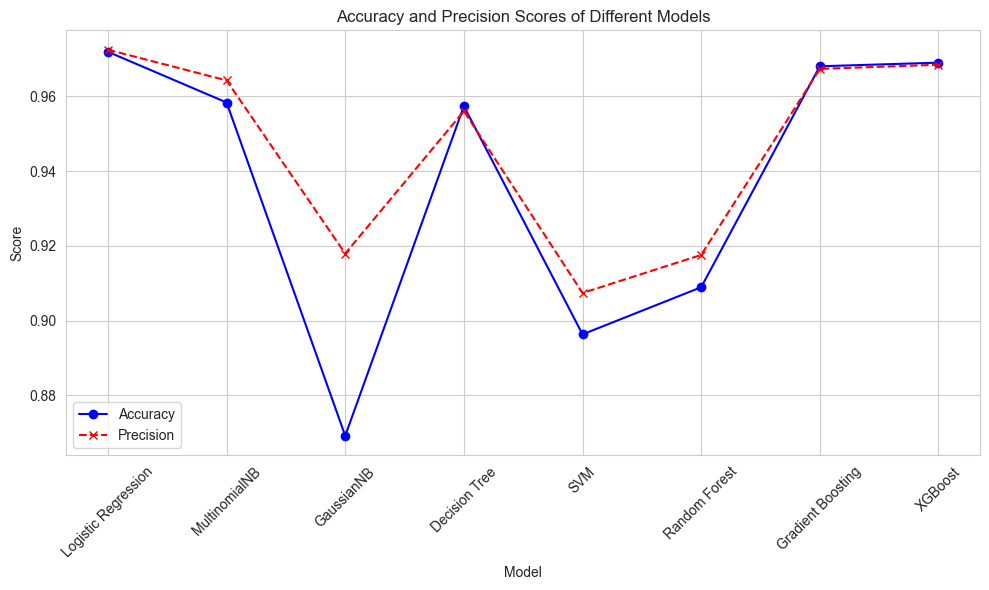

In [34]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression', 'MultinomialNB', 'GaussianNB', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting', 'XGBoost']
Accuracy = [lr_accuracy, mnb_accuracy, gnb_accuracy, dt_accuracy, svm_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy]
Precision = [lr_precision, mnb_precision, gnb_precision, dt_precision, svm_precision, rf_precision, gb_precision, xgb_precision]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion
For a Spam Mail Detection system, **Logistic Regression** is your clear winner.

##### Why Logistic Regression?
* **High Precision**: It only had 1 False Positive. In the real world, users hate it when their important mail disappears.
* **Great Balance**: It caught a significant amount of spam (108 caught vs 28 missed) while maintaining the highest accuracy (97.1%).
* **Speed**: It is much faster and lighter than XGBoost or Gradient Boosting.

### Saving the Model

In [35]:
import joblib
import os

# 1. Define your folder name
folder_name = 'saved_models'

# 2. Create the folder if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created!")

# 3. Save the model and vectorizer into that folder
joblib.dump(lr_model, os.path.join(folder_name, 'spam_model.joblib'))
joblib.dump(cv, os.path.join(folder_name, 'cv.joblib'))

print(f"Files saved successfully in: {os.path.abspath(folder_name)}")

Files saved successfully in: D:\Microsoft_AI_ML_Course\Examples\ModelProjects\saved_models


### Loading the Saved Model

In [36]:
# 1. Define the path to our custom folder
folder_name = 'saved_models'

# 2. Construct the full file paths
model_path = os.path.join(folder_name, 'spam_model.joblib')
vectorizer_path = os.path.join(folder_name, 'cv.joblib')

# 3. Load the files
# This brings the trained 'brain' and 'translator' back into memory
loaded_model = joblib.load(model_path)
loaded_vectorizer = joblib.load(vectorizer_path)

print("Model and Vectorizer loaded successfully!")

Model and Vectorizer loaded successfully!


### Predicting the new data as Spam vs Ham

In [53]:
# A new email example
new_email = ["Congratulations! SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"] # Spam


# Step A: Transform the raw text into numbers using the loaded Vectorizer
# (Don't use .fit_transform() here! Use only .transform())
email_numeric = loaded_vectorizer.transform(new_email)

# Step B: Make the prediction
prediction = loaded_model.predict(email_numeric)

# Step C: Show the result
if prediction[0] == 1:
    print("Result: This is SPAM!")
else:
    print("Result: This is a legit email (HAM).")

Result: This is SPAM!
